### Nicole Patricia Góngora Rodríguez
### 51225
### 8vo Semestre. Ingenieria de sistemas Computacionales

In [1]:
import pandas as pd # Trabajos con datasets
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt #Gráficos sencillos
from datetime import datetime, date

7 etapas para un análisis exploratorio
    
1. Clarificar la pregunta o preguntas a responder
2. Tener una idea general del dataset o datasets
3. Verificar los tipos de datos que tenemos
4. Elegir estadísticas descriptivas para los datos
5. Visualizar datos
6. Analizar posibles interacciones entre variables
7. Extraer algunas conclusiones y eventualmente dar líneas directoras para un análisis más profundo

In [2]:
Transaccion=pd.read_csv('Transacciones7.csv')
Transaccion.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,16278056728,271092,13-06-2011,11,6,3,848,267.120,2811.120,Flagship store
1,1563634628,268522,28-08-2013,3,5,5,962,505.050,5315.050,MBR
2,5886533256,272425,7/4/2012,10,3,5,1419,744.975,7839.975,e-Shop
3,67858620539,269184,31-03-2013,6,5,3,165,51.975,546.975,Flagship store
4,81541766449,268819,30-09-2012,9,3,5,815,427.875,4502.875,e-Shop


In [3]:
Clientes=pd.read_csv('Customer.csv')
Clientes.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
Productos=pd.read_csv('prod_cat_info.csv')
Productos.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
Productos

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


#### 1. Discutir con los requerimientos del análisis solicitado, para formular preguntas a responder con el dataset

1. Porcentaje de concurrencia y ganancias en transacciones por tipos de tiendas
2. Clasificación, porcentaje y cantidad de productos adquiridos por categoría
3. Relación entre la categoría del producto con el género del cliente
4. Relación entre la zona del cliente con la devolución de productos
5. Relación entre el tipo de tienda y la devolución de productos con respecto a las ganancias totales
6. Relación entre la edad del cliente y la subcategoría de productos con respecto al monto ganado
7. Relación entre el año de compra y la categoría con respecto a la devolución de productos

#### 2. Mirar en detalle el dataset: ¿Se debe realizar etapas de limpieza, variables dummy u otros? ¿Se puede trabajar con él? 

##### En la tabla de Transacciones

In [6]:
Transaccion.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,16278056728,271092,13-06-2011,11,6,3,848,267.120,2811.120,Flagship store
1,1563634628,268522,28-08-2013,3,5,5,962,505.050,5315.050,MBR
2,5886533256,272425,7/4/2012,10,3,5,1419,744.975,7839.975,e-Shop
3,67858620539,269184,31-03-2013,6,5,3,165,51.975,546.975,Flagship store
4,81541766449,268819,30-09-2012,9,3,5,815,427.875,4502.875,e-Shop


In [7]:
Transaccion.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

Los impuestos y montos totales son numerales, pero están en tres decimales, lo cual es muy inusual en el análisis

In [8]:
nulls=Transaccion.isna().sum()
nulls

transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code         0
Qty                   0
Rate                  0
Tax                 128
total_amt             0
Store_type            0
dtype: int64

Lo único con datos faltantes en la base de datos es la columna de impuestos

In [9]:
fechas=Transaccion.tran_date.unique()
for i in fechas:
    print(i)

13-06-2011
28-08-2013
7/4/2012
31-03-2013
30-09-2012
25-04-2013
17-11-2013
9/1/2012
16-12-2012
9/11/2012
2/9/2012
24-06-2012
2/12/2011
28-10-2013
13-12-2012
16-11-2013
13-01-2013
6/4/2012
15-02-2011
24-09-2011
18-05-2013
13-05-2011
25-08-2012
31-08-2011
26-06-2012
9/8/2012
15-09-2011
15-12-2011
22-07-2013
1/8/2013
3/10/2012
31-03-2011
3/4/2011
29-07-2011
25-03-2012
27-03-2013
20-09-2013
21-01-2014
11/8/2011
13-02-2012
30-10-2012
11/12/2013
7/11/2011
26-12-2013
19-11-2013
20-02-2012
4/9/2012
24-04-2011
17-09-2013
5/11/2012
20-02-2013
10/2/2013
9/12/2013
6/8/2011
4/1/2013
17-04-2011
1/6/2012
6/1/2013
14-05-2011
9/2/2013
24-06-2011
1/1/2014
23-07-2012
23-08-2013
13-03-2011
12/10/2011
8/5/2012
28-09-2013
3/8/2011
31-10-2013
21-08-2013
1/2/2013
9/10/2012
21-10-2011
25-09-2012
19-04-2011
28-09-2011
14-04-2011
23-06-2011
30-08-2011
15-08-2012
2/5/2012
19-11-2012
27-09-2013
18-12-2012
10/6/2013
11/10/2012
13-04-2012
3/10/2011
15-07-2011
21-01-2012
1/9/2011
11/11/2013
15-07-2012
14-12-2013
23-0

Las fechas están en distintos formatos, y son en formato string (object)

###### En la tabla de Clientes

In [10]:
Clientes.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [11]:
Clientes.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [12]:
nulls1=Clientes.isna().sum()
nulls1

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [13]:
fechas2=Clientes.DOB.unique()
for i in fechas2:
    print(i)

02-01-1970
07-01-1970
08-01-1970
10-01-1970
11-01-1970
15-01-1970
16-01-1970
18-01-1970
21-01-1970
22-01-1970
23-01-1970
25-01-1970
26-01-1970
29-01-1970
01-02-1970
06-02-1970
09-02-1970
13-02-1970
14-02-1970
17-02-1970
18-02-1970
19-02-1970
20-02-1970
21-02-1970
22-02-1970
04-03-1970
07-03-1970
08-03-1970
12-03-1970
14-03-1970
15-03-1970
16-03-1970
17-03-1970
21-03-1970
22-03-1970
23-03-1970
26-03-1970
27-03-1970
28-03-1970
29-03-1970
01-04-1970
02-04-1970
04-04-1970
06-04-1970
14-04-1970
18-04-1970
19-04-1970
22-04-1970
24-04-1970
26-04-1970
29-04-1970
02-05-1970
03-05-1970
06-05-1970
09-05-1970
10-05-1970
12-05-1970
14-05-1970
15-05-1970
16-05-1970
22-05-1970
23-05-1970
01-06-1970
02-06-1970
03-06-1970
05-06-1970
09-06-1970
10-06-1970
11-06-1970
15-06-1970
16-06-1970
17-06-1970
19-06-1970
23-06-1970
25-06-1970
26-06-1970
29-06-1970
01-07-1970
04-07-1970
05-07-1970
09-07-1970
10-07-1970
11-07-1970
14-07-1970
16-07-1970
17-07-1970
23-07-1970
24-07-1970
26-07-1970
27-07-1970
02-08-1970

Las fechas estan en un formato uniforme

In [14]:
Clientes.Gender.unique()

array(['M', 'F', nan], dtype=object)

##### En la tabla de Productos

In [15]:
Productos.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [16]:
Productos.dtypes

prod_cat_code         int64
prod_cat             object
prod_sub_cat_code     int64
prod_subcat          object
dtype: object

In [17]:
Productos.isna().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [18]:
Productos.prod_cat.unique()

array(['Clothing', 'Footwear', 'Electronics', 'Bags', 'Books',
       'Home and kitchen'], dtype=object)

In [19]:
Productos.prod_subcat.unique()

array(['Mens', 'Women', 'Kids', 'Mobiles', 'Computers',
       'Personal Appliances', 'Cameras', 'Audio and video', 'Fiction',
       'Academic', 'Non-Fiction', 'Children', 'Comics', 'DIY',
       'Furnishing', 'Kitchen', 'Bath', 'Tools'], dtype=object)

La tabla de productos no requiere cambios, no tiene datos nulos y consiste en sólo descripciones y códigos de categorías y subcategorías

In [20]:
Transaccion.Rate.min()

-1498

#### Se debe limpiar la información. Como se requiere UN SOLO análisis, esto incluye a todas las tablas antes de mezclarlas

##### Transacción

Los valores de Impuestos (Tax) y Monto Total de Ganancia (total_amt), están en tres decimales, lo cual es algo inusual para el cálculo de cifras.
Redondearemos todos los valores a dos decimales

In [21]:
Transaccion.Tax=Transaccion['Tax'].round(2)
Transaccion.total_amt=Transaccion['total_amt'].round(2)
Transaccion.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,16278056728,271092,13-06-2011,11,6,3,848,267.12,2811.12,Flagship store
1,1563634628,268522,28-08-2013,3,5,5,962,505.05,5315.05,MBR
2,5886533256,272425,7/4/2012,10,3,5,1419,744.98,7839.98,e-Shop
3,67858620539,269184,31-03-2013,6,5,3,165,51.98,546.98,Flagship store
4,81541766449,268819,30-09-2012,9,3,5,815,427.88,4502.88,e-Shop


Como hay datos nulos en la columna de Impuestos, se debe asumir que, como ya existe en cada fila el precio total de ganancia y una de nuestras preguntas quiere saber la relación entre la zona y el impuesto pagado, se llenarán los nulos con 0.00, como si no hubiera habido algún impuesto a pagar en su caso

In [22]:
Transaccion.Tax=Transaccion['Tax'].fillna(0.00)
Transaccion.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,16278056728,271092,13-06-2011,11,6,3,848,267.12,2811.12,Flagship store
1,1563634628,268522,28-08-2013,3,5,5,962,505.05,5315.05,MBR
2,5886533256,272425,7/4/2012,10,3,5,1419,744.98,7839.98,e-Shop
3,67858620539,269184,31-03-2013,6,5,3,165,51.98,546.98,Flagship store
4,81541766449,268819,30-09-2012,9,3,5,815,427.88,4502.88,e-Shop


Para calcular las ganancias por años, se deben formatear las fechas y sustituir la columna de fecha de transacción por año de transacción

In [23]:
def convertDates(dataset,columna):
    anios=[]
    for i in dataset[columna]:
        new_date=''
        if '-' in i:
            new_date=datetime.strptime(i, '%d-%m-%Y').date()
        elif '/' in i:
            new_date=datetime.strptime(i, '%d/%m/%Y').date()
        anios.append(new_date.year)
    return anios

In [24]:
anios=convertDates(Transaccion,'tran_date')

In [25]:
Transaccion['Year']=anios
Transaccion=Transaccion.drop(['tran_date'],axis=1)
Transaccion.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year
0,16278056728,271092,11,6,3,848,267.12,2811.12,Flagship store,2011
1,1563634628,268522,3,5,5,962,505.05,5315.05,MBR,2013
2,5886533256,272425,10,3,5,1419,744.98,7839.98,e-Shop,2012
3,67858620539,269184,6,5,3,165,51.98,546.98,Flagship store,2013
4,81541766449,268819,9,3,5,815,427.88,4502.88,e-Shop,2012


Existen datos nulos en las columnas city_code y Gender de la tabla Clientes

In [26]:
Clientes[(Clientes.city_code.isna())|(Clientes.Gender.isna())]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


Obtener los datos únicos de categoría y sacar la variable $nan$ para evitar que la escojan en el llenado de variables nulas

In [27]:
codes=Clientes.city_code.unique()
codes=[item for item in codes if not(pd.isnull(item)) == True]

In [28]:
genders=Clientes.Gender.unique()
genders=[item for item in genders if not(pd.isnull(item)) == True]

In [29]:
np.random.seed(2022) #Para tener las mismas probabilidades aleatorias
Clientes.city_code=Clientes.city_code.fillna(np.random.choice(codes))
Clientes.Gender=Clientes.Gender.fillna(np.random.choice(genders))

In [30]:
Clientes.isna().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

Con los datos nulos eliminados, se puede realizar el formateo de valores de los códigos de ciudad a una cifra entera (son indicadores de la zona más que cantidad)

In [31]:
Clientes.city_code=Clientes.city_code.astype(np.int64)
Clientes.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4
1,269696,07-01-1970,F,8
2,268159,08-01-1970,F,8
3,270181,10-01-1970,F,2
4,268073,11-01-1970,M,1


Como las cifras de la tabla Productos son referentes obligatorios para asociar sus productos a las transacciones, no hay que hacer cambios drásticos

Para agrupar las tablas, hay que cambiar los nombres de las columnas que corresponden a los códigos de aquellas externas a la tabla de Transaccion

In [32]:
Clientes.columns=['cust_id','DOB','Gender','city_code']
Productos.columns=['prod_cat_code','prod_cat','prod_subcat_code','prod_subcat']

In [33]:
Data=pd.merge(Transaccion,Clientes,how='inner')
Data.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year,DOB,Gender,city_code
0,16278056728,271092,11,6,3,848,267.12,2811.12,Flagship store,2011,26-06-1987,F,7
1,33034382290,271092,10,5,4,1400,588.00,6188.00,TeleShop,2011,26-06-1987,F,7
2,28612670846,271092,10,3,1,985,0.00,1088.42,MBR,2012,26-06-1987,F,7
3,95072896426,271092,12,6,-3,-1481,466.52,-4909.52,e-Shop,2011,26-06-1987,F,7
4,1563634628,268522,3,5,5,962,505.05,5315.05,MBR,2013,19-09-1975,M,6


In [34]:
Transaccion.shape,Clientes.shape,Productos.shape

((6000, 10), (5647, 4), (23, 4))

Verificando con una tabla externa que el merge haya sido correcto

In [35]:
Transaccion[Transaccion.cust_id==271092]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year
0,16278056728,271092,11,6,3,848,267.12,2811.12,Flagship store,2011
1985,33034382290,271092,10,5,4,1400,588.00,6188.00,TeleShop,2011
2526,28612670846,271092,10,3,1,985,0.00,1088.42,MBR,2012
5430,95072896426,271092,12,6,-3,-1481,466.52,-4909.52,e-Shop,2011


In [36]:
Data=pd.merge(Data,Productos,how='inner')
Data.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year,DOB,Gender,city_code,prod_cat,prod_subcat
0,16278056728,271092,11,6,3,848,267.12,2811.12,Flagship store,2011,26-06-1987,F,7,Home and kitchen,Bath
1,74101790394,269184,11,6,5,1301,683.02,7188.02,TeleShop,2011,27-08-1975,F,4,Home and kitchen,Bath
2,4201634479,272252,11,6,2,896,188.16,1980.16,e-Shop,2011,06-03-1991,F,10,Home and kitchen,Bath
3,97341485937,270775,11,6,5,680,357.00,3757.00,MBR,2012,12-10-1986,F,4,Home and kitchen,Bath
4,95462385777,273023,11,6,5,1453,762.82,8027.82,e-Shop,2014,24-07-1988,F,5,Home and kitchen,Bath


In [37]:
Data.shape

(6000, 15)

#### 3. Una vez el dataset está limpio y se tienen los objetivos, verificar las variables, longitud del dataset, tipos de variables (categóricas o cuantitativas), realizar variables dummy si es necesario y que las variables cuantitativas NO estén en string

In [38]:
Data.shape

(6000, 15)

In [39]:
Data.corr()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Year,city_code
transaction_id,1.000000,0.005621,-0.002793,-0.004892,0.004716,0.005346,0.020765,0.011647,-0.014897,-0.000451
cust_id,0.005621,1.000000,0.003838,-0.020511,-0.002566,-0.007385,0.004811,-0.000312,-0.005579,0.020268
prod_subcat_code,-0.002793,0.003838,1.000000,0.548874,-0.019038,-0.005170,-0.022753,-0.018004,-0.015849,0.017192
prod_cat_code,-0.004892,-0.020511,0.548874,1.000000,-0.019646,0.004743,-0.003849,-0.010726,-0.005014,0.006341
Qty,0.004716,-0.002566,-0.019038,-0.019646,1.000000,0.579052,0.272927,0.793460,-0.005476,-0.004006
Rate,0.005346,-0.007385,-0.005170,0.004743,0.579052,1.000000,0.324450,0.827539,0.003486,0.006555
Tax,0.020765,0.004811,-0.022753,-0.003849,0.272927,0.324450,1.000000,0.568485,0.000677,0.024596
total_amt,0.011647,-0.000312,-0.018004,-0.010726,0.793460,0.827539,0.568485,1.000000,0.001168,0.005864
Year,-0.014897,-0.005579,-0.015849,-0.005014,-0.005476,0.003486,0.000677,0.001168,1.000000,0.008565
city_code,-0.000451,0.020268,0.017192,0.006341,-0.004006,0.006555,0.024596,0.005864,0.008565,1.000000


Como la edad del cliente es lo que queremos analizar, hay que tomar la fecha de nacimiento y calcular su edad a partir de esta, creando una nueva columna en la base de datos combinada

In [40]:
def calculateYears(dataf,column):
    years=[]
    for dater in dataf[column]:
        hoy = date.today()
        dob= datetime.strptime(dater, '%d-%m-%Y').date()
        anio = hoy.year - dob.year - ((hoy.month, hoy.day) < (dob.month, dob.day))
        years.append(anio)
    return years

In [41]:
ys=calculateYears(Data,'DOB')
len(ys),Clientes.shape

(6000, (5647, 4))

In [42]:
Data['Age']=ys
Data.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year,DOB,Gender,city_code,prod_cat,prod_subcat,Age
0,16278056728,271092,11,6,3,848,267.12,2811.12,Flagship store,2011,26-06-1987,F,7,Home and kitchen,Bath,35
1,74101790394,269184,11,6,5,1301,683.02,7188.02,TeleShop,2011,27-08-1975,F,4,Home and kitchen,Bath,47
2,4201634479,272252,11,6,2,896,188.16,1980.16,e-Shop,2011,06-03-1991,F,10,Home and kitchen,Bath,31
3,97341485937,270775,11,6,5,680,357.00,3757.00,MBR,2012,12-10-1986,F,4,Home and kitchen,Bath,35
4,95462385777,273023,11,6,5,1453,762.82,8027.82,e-Shop,2014,24-07-1988,F,5,Home and kitchen,Bath,34


Los ID de cada transacción, categoría, subcategoría, cliente y la fecha de nacimiento NO SON NECESARIOS para el análisis exploratorio. Por lo tanto, se deben ir

In [43]:
DataFr=Data.drop(['transaction_id','cust_id','prod_subcat_code','prod_cat_code','DOB'],axis=1)
DataFr.head()

,Qty,Rate,Tax,total_amt,Store_type,Year,Gender,city_code,prod_cat,prod_subcat,Age
0,3,848,267.12,2811.12,Flagship store,2011,F,7,Home and kitchen,Bath,35
1,5,1301,683.02,7188.02,TeleShop,2011,F,4,Home and kitchen,Bath,47
2,2,896,188.16,1980.16,e-Shop,2011,F,10,Home and kitchen,Bath,31
3,5,680,357.00,3757.00,MBR,2012,F,4,Home and kitchen,Bath,35
4,5,1453,762.82,8027.82,e-Shop,2014,F,5,Home and kitchen,Bath,34


Podemos dummificar el género

In [44]:
temp1=pd.get_dummies(DataFr.Gender)
temp1

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5995,0,1
5996,0,1
5997,0,1
5998,1,0


In [45]:
DataFr=DataFr.drop(['Gender'],axis=1)
DataFr=pd.concat([DataFr,temp1.F],axis=1)
DataFr

,Qty,Rate,Tax,total_amt,Store_type,Year,city_code,prod_cat,prod_subcat,Age,F
0,3,848,267.12,2811.12,Flagship store,2011,7,Home and kitchen,Bath,35,1
1,5,1301,683.02,7188.02,TeleShop,2011,4,Home and kitchen,Bath,47,1
2,2,896,188.16,1980.16,e-Shop,2011,10,Home and kitchen,Bath,31,1
3,5,680,357.00,3757.00,MBR,2012,4,Home and kitchen,Bath,35,1
4,5,1453,762.82,8027.82,e-Shop,2014,5,Home and kitchen,Bath,34,1
...,...,...,...,...,...,...,...,...,...,...,...
5995,1,353,37.06,390.06,e-Shop,2011,7,Electronics,Mobiles,42,0
5996,3,542,170.73,1796.73,TeleShop,2013,5,Electronics,Mobiles,32,0
5997,5,211,110.78,1165.78,MBR,2012,4,Electronics,Mobiles,33,0
5998,5,1416,743.40,7823.40,e-Shop,2011,6,Electronics,Mobiles,41,1


In [46]:
DataFr.columns

Index(['Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'Year', 'city_code',
       'prod_cat', 'prod_subcat', 'Age', 'F'],
      dtype='object')

In [47]:
DataFr.columns=['Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'Year', 'city_code',
       'prod_cat', 'prod_subcat', 'Age', 'Gender']
DataFr

,Qty,Rate,Tax,total_amt,Store_type,Year,city_code,prod_cat,prod_subcat,Age,Gender
0,3,848,267.12,2811.12,Flagship store,2011,7,Home and kitchen,Bath,35,1
1,5,1301,683.02,7188.02,TeleShop,2011,4,Home and kitchen,Bath,47,1
2,2,896,188.16,1980.16,e-Shop,2011,10,Home and kitchen,Bath,31,1
3,5,680,357.00,3757.00,MBR,2012,4,Home and kitchen,Bath,35,1
4,5,1453,762.82,8027.82,e-Shop,2014,5,Home and kitchen,Bath,34,1
...,...,...,...,...,...,...,...,...,...,...,...
5995,1,353,37.06,390.06,e-Shop,2011,7,Electronics,Mobiles,42,0
5996,3,542,170.73,1796.73,TeleShop,2013,5,Electronics,Mobiles,32,0
5997,5,211,110.78,1165.78,MBR,2012,4,Electronics,Mobiles,33,0
5998,5,1416,743.40,7823.40,e-Shop,2011,6,Electronics,Mobiles,41,1


Queremos saber si el producto fue devuelto o no. Debemos utilizar la columna Rate para ver esta condicion, considerado que se trata del precio y que un valor negativo indica devolución

In [48]:
def getDevol(dataf,variable):
    arrayD=[]
    for i in dataf[variable]:
        if i>=0:
            arrayD.append(0)
        else:
            arrayD.append(1)
    return arrayD

In [49]:
devArr=getDevol(DataFr,'Rate')
devArr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
DataFr['Returned']=devArr
DataFr
DataFr['Rate']=DataFr['Rate'].abs()
DataFr['total_amt']=DataFr['total_amt'].abs()
DataFr['Qty']=DataFr['Qty'].abs()
DataFr

,Qty,Rate,Tax,total_amt,Store_type,Year,city_code,prod_cat,prod_subcat,Age,Gender,Returned
0,3,848,267.12,2811.12,Flagship store,2011,7,Home and kitchen,Bath,35,1,0
1,5,1301,683.02,7188.02,TeleShop,2011,4,Home and kitchen,Bath,47,1,0
2,2,896,188.16,1980.16,e-Shop,2011,10,Home and kitchen,Bath,31,1,0
3,5,680,357.00,3757.00,MBR,2012,4,Home and kitchen,Bath,35,1,0
4,5,1453,762.82,8027.82,e-Shop,2014,5,Home and kitchen,Bath,34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,353,37.06,390.06,e-Shop,2011,7,Electronics,Mobiles,42,0,0
5996,3,542,170.73,1796.73,TeleShop,2013,5,Electronics,Mobiles,32,0,0
5997,5,211,110.78,1165.78,MBR,2012,4,Electronics,Mobiles,33,0,0
5998,5,1416,743.40,7823.40,e-Shop,2011,6,Electronics,Mobiles,41,1,0


In [51]:
DataFr.corr()

,Qty,Rate,Tax,total_amt,Year,city_code,Age,Gender,Returned
Qty,1.000000,-0.017466,0.605823,0.625146,0.000849,0.013484,-0.013675,0.000406,0.023675
Rate,-0.017466,1.000000,0.669894,0.693986,0.007371,0.024227,0.019864,-0.001672,0.021594
Tax,0.605823,0.669894,1.000000,0.966218,0.000677,0.024596,0.011456,0.000740,0.034190
total_amt,0.625146,0.693986,0.966218,1.000000,0.004003,0.025066,0.009955,-0.001308,0.029674
Year,0.000849,0.007371,0.000677,0.004003,1.000000,0.008565,-0.006748,-0.005820,0.000671
city_code,0.013484,0.024227,0.024596,0.025066,0.008565,1.000000,0.009057,0.006834,0.012437
Age,-0.013675,0.019864,0.011456,0.009955,-0.006748,0.009057,1.000000,-0.003984,0.007296
Gender,0.000406,-0.001672,0.000740,-0.001308,-0.005820,0.006834,-0.003984,1.000000,0.013136
Returned,0.023675,0.021594,0.034190,0.029674,0.000671,0.012437,0.007296,0.013136,1.000000


#### 4. Realizar estadísticas con las variables

1. Porcentaje de concurrencia y ganancias en transacciones por tipos de tiendas
2. Clasificación, porcentaje y cantidad de productos adquiridos por categoría
3. Relación entre la categoría del producto con el género del cliente
4. Relación entre la zona del cliente con la devolución de productos
5. Relación entre el tipo de tienda y la devolución de productos con respecto a las ganancias totales
6. Relación entre la edad del cliente y la subcategoría de productos con respecto al monto ganado
7. Relación entre el año de compra y la categoría con respecto a la devolución de productos

In [52]:
Agrupa1=DataFr.groupby('Store_type')
Agrupa1a=Agrupa1[['total_amt']].count()
Agrupa1b=Agrupa1[['total_amt']].sum()
Agrupa1a

,total_amt
Store_type,
Flagship store,1200
MBR,1235
TeleShop,1191
e-Shop,2374


In [53]:
Agrupa1b

,total_amt
Store_type,
Flagship store,3138860.81
MBR,3252397.34
TeleShop,2976794.85
e-Shop,6251911.09


In [54]:
Agrupa1a.index

Index(['Flagship store', 'MBR', 'TeleShop', 'e-Shop'], dtype='object', name='Store_type')

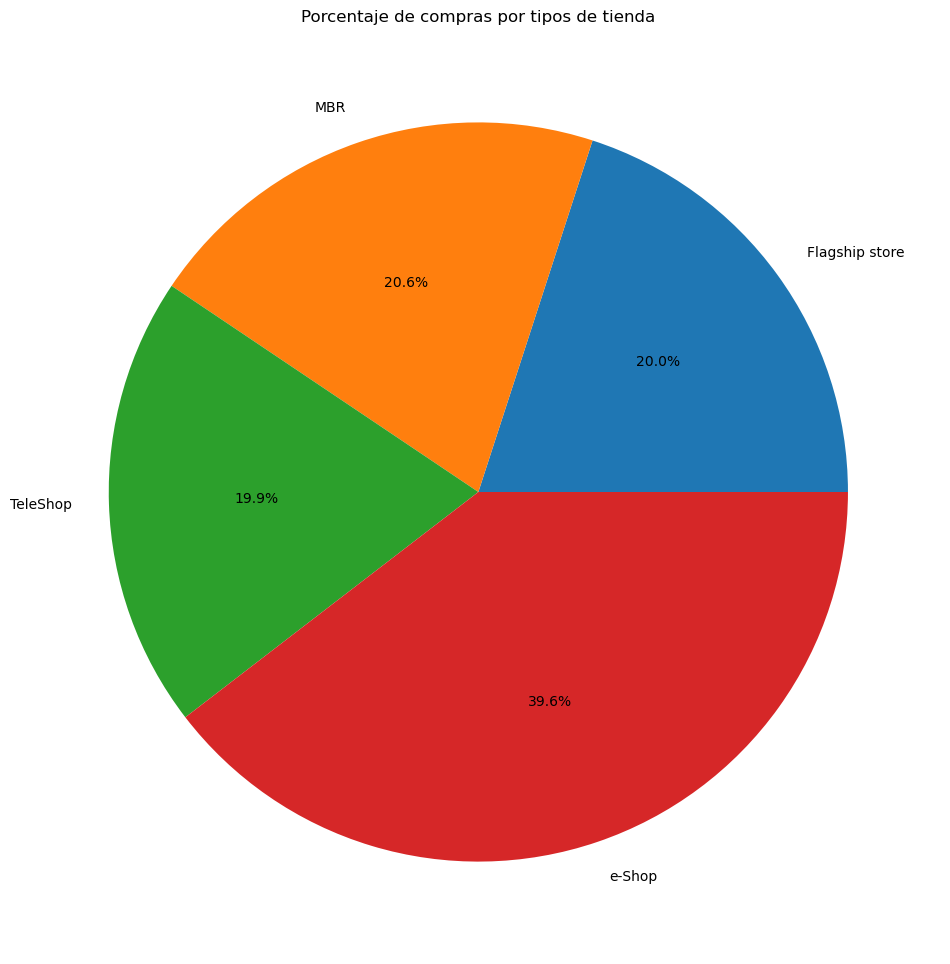

,total_amt
Store_type,
Flagship store,1200
MBR,1235
TeleShop,1191
e-Shop,2374


In [55]:
plt.figure(figsize=(12,12))
plt.pie(np.array(Agrupa1a['total_amt']),labels=Agrupa1a.index,autopct='%1.1f%%')
plt.title("Porcentaje de compras por tipos de tienda")
plt.show()
Agrupa1a

In [56]:
Agrupa1b

,total_amt
Store_type,
Flagship store,3138860.81
MBR,3252397.34
TeleShop,2976794.85
e-Shop,6251911.09


4.1. Las ventas por Internet (e-Shop) son las que mayor concurrencia tuvieron en un 39,6%, seguidas de aquellas de tipo MBR

In [57]:
Agrupa2=DataFr.groupby('prod_cat')
Agrupa2=Agrupa2[['total_amt']].count()
Agrupa2

,total_amt
prod_cat,
Bags,536
Books,1555
Clothing,743
Electronics,1288
Footwear,811
Home and kitchen,1067


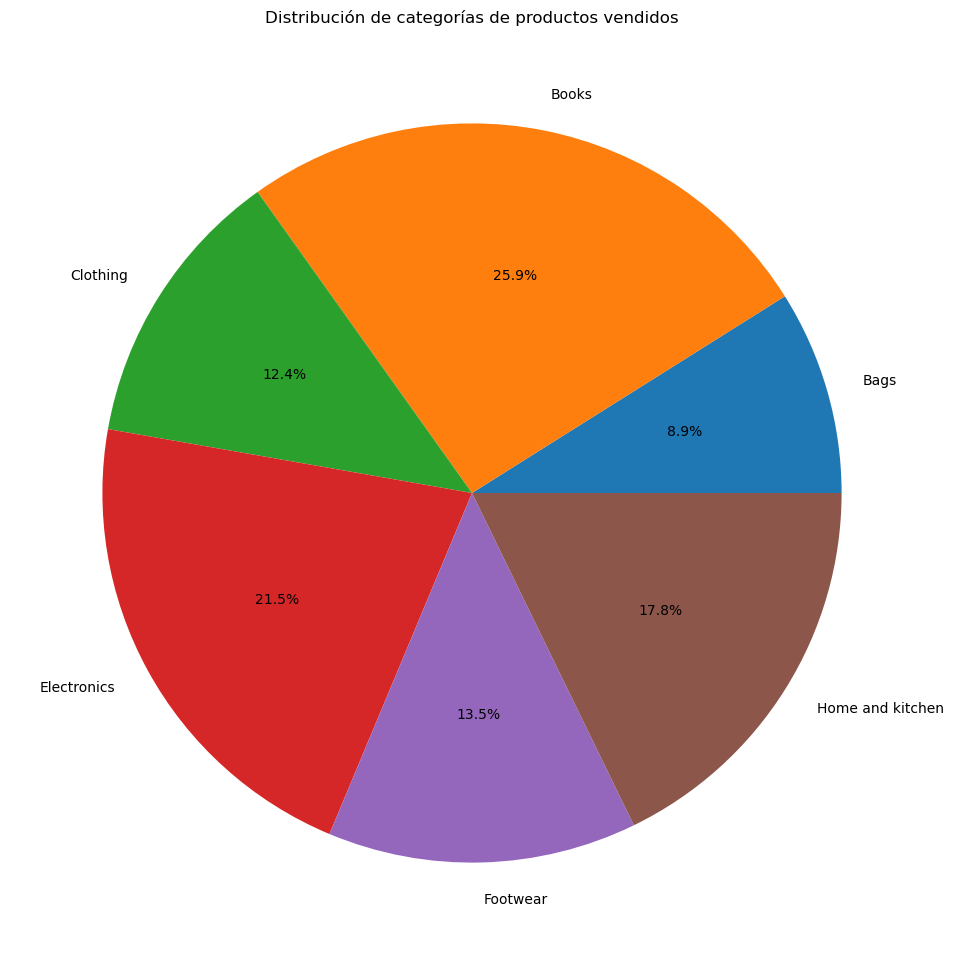

In [58]:
plt.figure(figsize=(12,12))
plt.pie(np.array(Agrupa2['total_amt']),labels=Agrupa2.index,autopct='%1.1f%%')
plt.title("Distribución de categorías de productos vendidos")
plt.show()

In [59]:
def createSubPie(dataset,variable,vsub,vcla):
    classes=dataset[variable].unique()
    subclases=[]
    counts=[]
    de=dataset[dataset[variable]==vcla]
    subs=de[vsub].unique()
    for sub in subs:
        defe=de[de[vsub]==sub]
        nums=defe[vsub].count()
        counts.append(nums)
        subclases.append(sub)
    dataframe=pd.DataFrame({
        'Subcategorias':subclases,
        'Cantidad':counts
    })
    dataframe=dataframe.set_index(dataframe.columns[0])
    plt.figure(figsize=(12,12))
    plt.pie(np.array(dataframe['Cantidad']),labels=dataframe.index,autopct='%1.1f%%')
    titl="Distribución de subcategorías de "+vcla+" vendidos"
    plt.title(titl)
    plt.show()
    return dataframe     

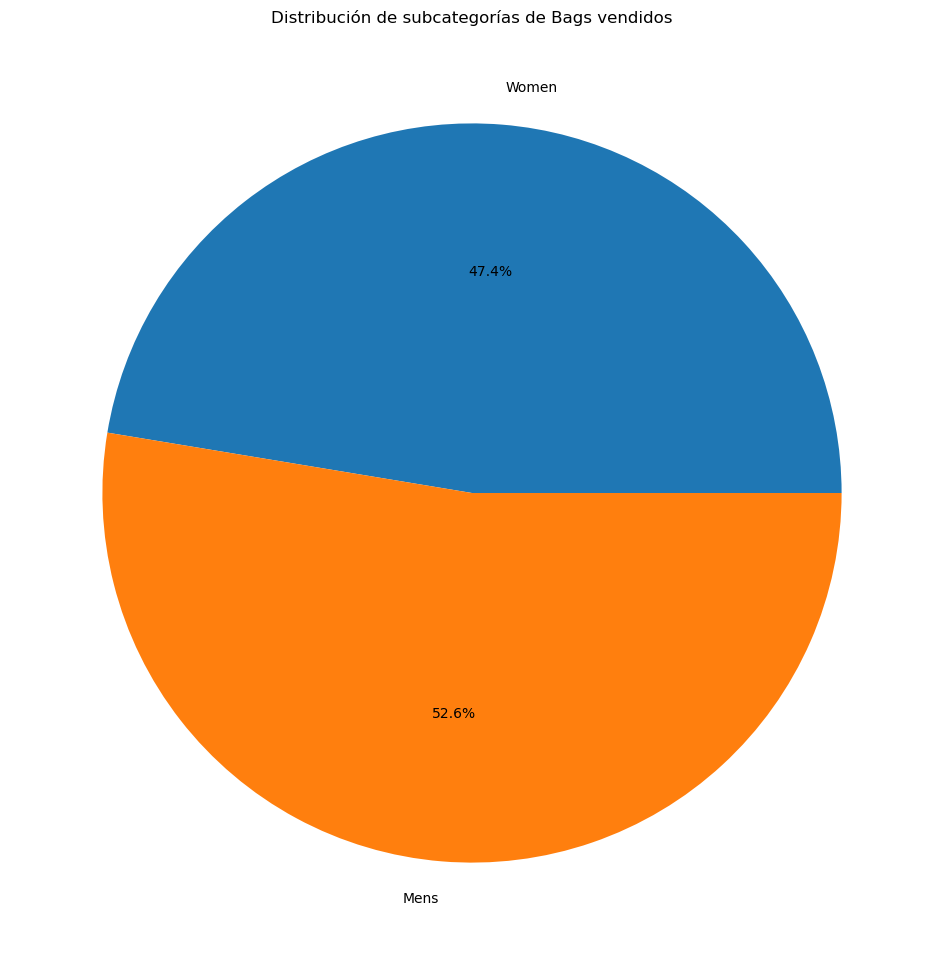

,Cantidad
Subcategorias,
Women,254
Mens,282


In [60]:
dataSubBags=createSubPie(DataFr,'prod_cat','prod_subcat','Bags')
dataSubBags

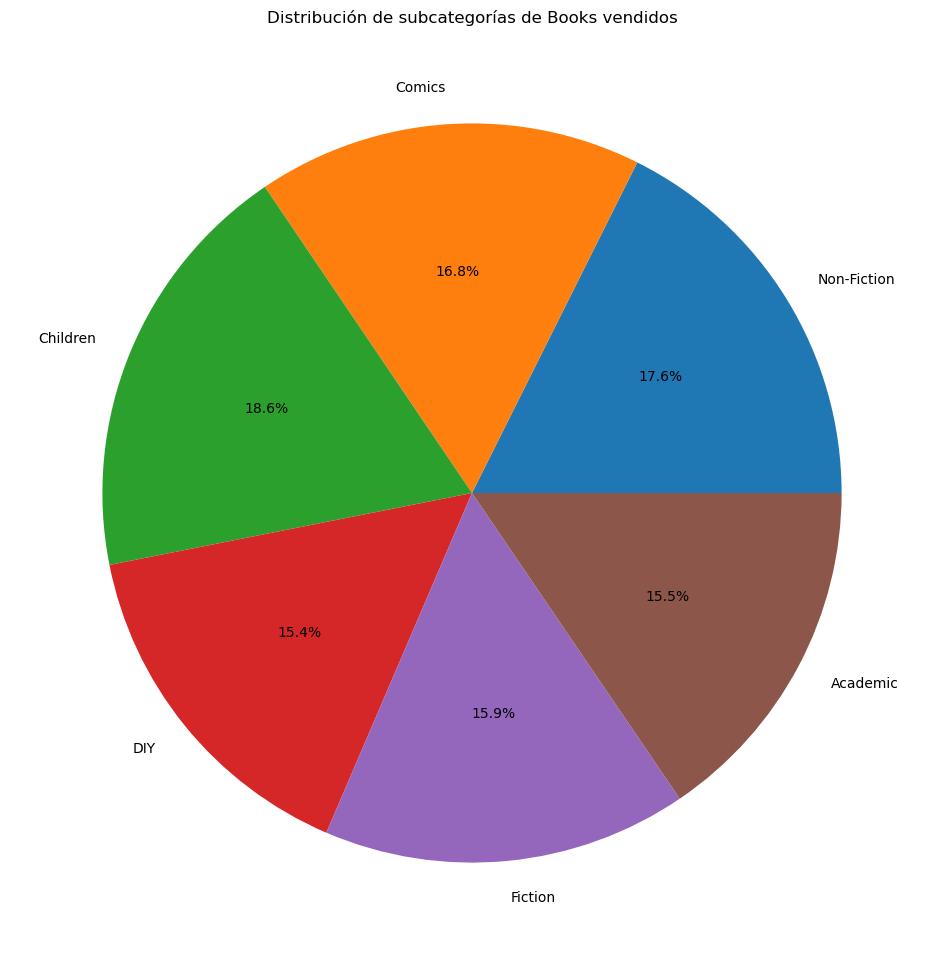

,Cantidad
Subcategorias,
Non-Fiction,274
Comics,262
Children,290
DIY,240
Fiction,248
Academic,241


In [61]:
dataSubBooks=createSubPie(DataFr,'prod_cat','prod_subcat','Books')
dataSubBooks

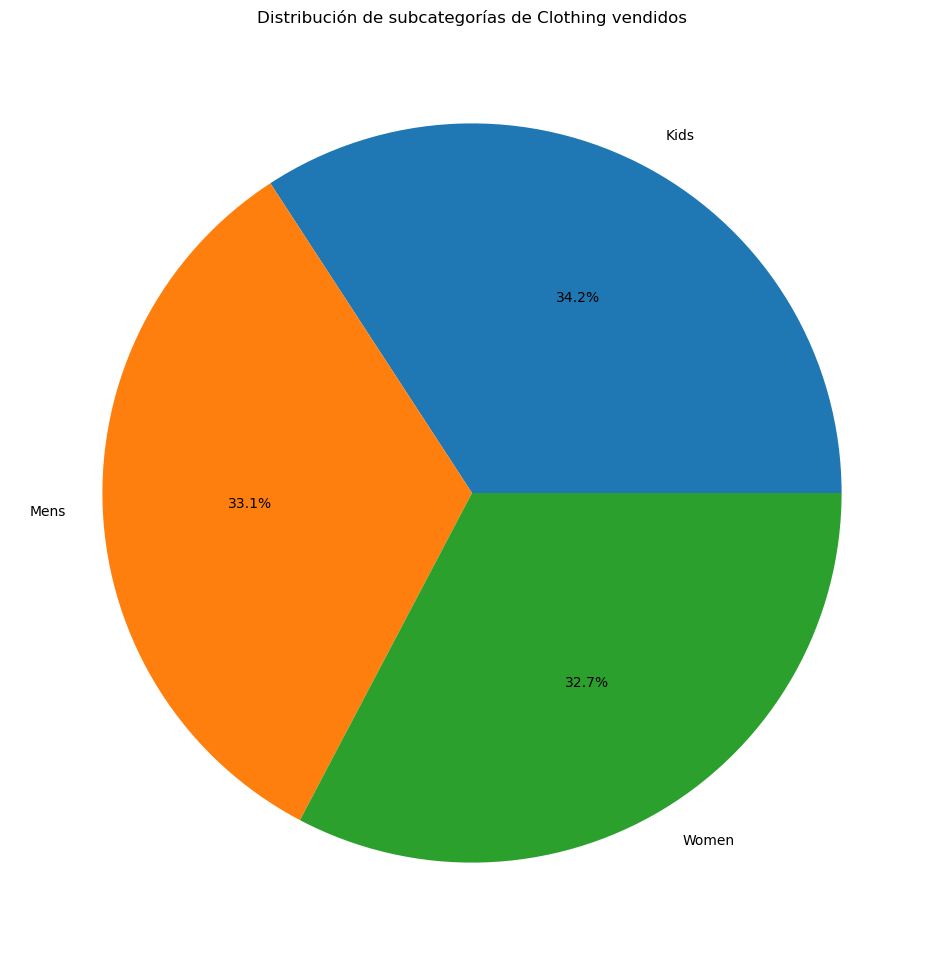

,Cantidad
Subcategorias,
Kids,254
Mens,246
Women,243


In [62]:
dataSubCloth=createSubPie(DataFr,'prod_cat','prod_subcat','Clothing')
dataSubCloth

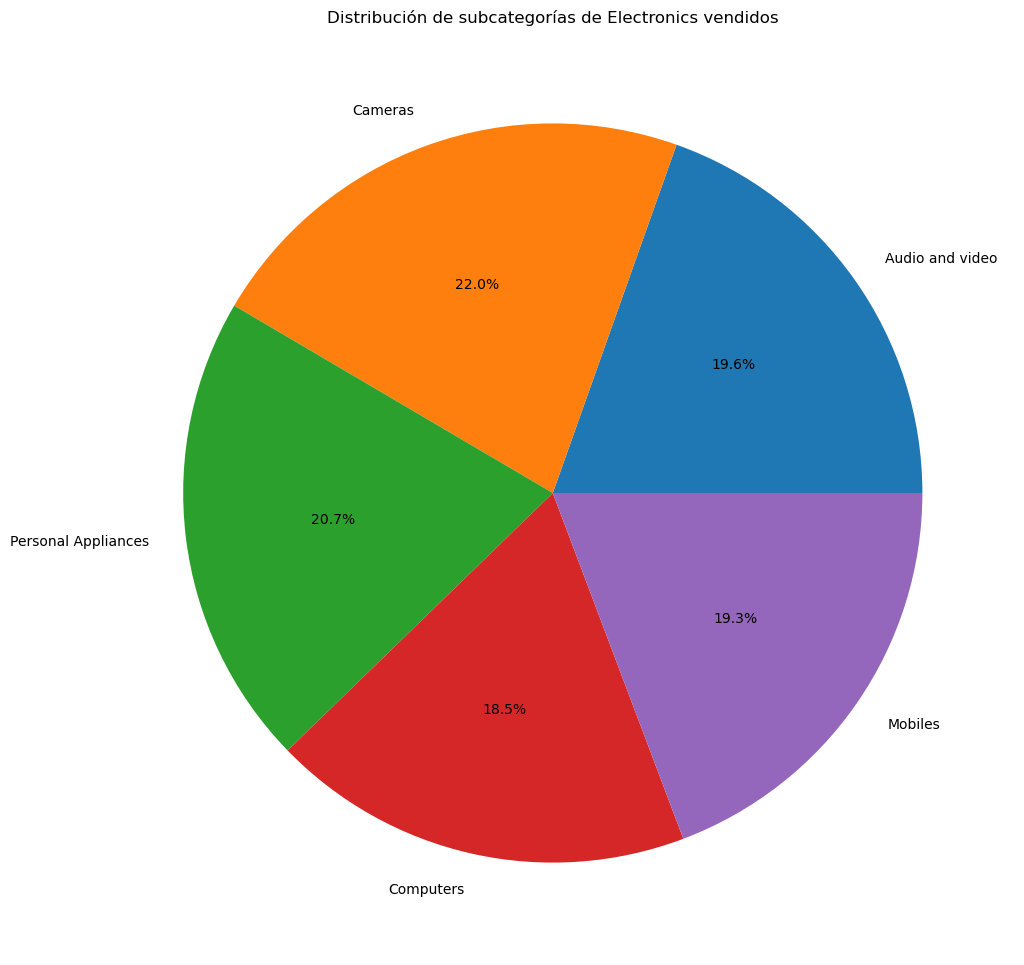

,Cantidad
Subcategorias,
Audio and video,252
Cameras,283
Personal Appliances,267
Computers,238
Mobiles,248


In [63]:
dataSubEle=createSubPie(DataFr,'prod_cat','prod_subcat','Electronics')
dataSubEle

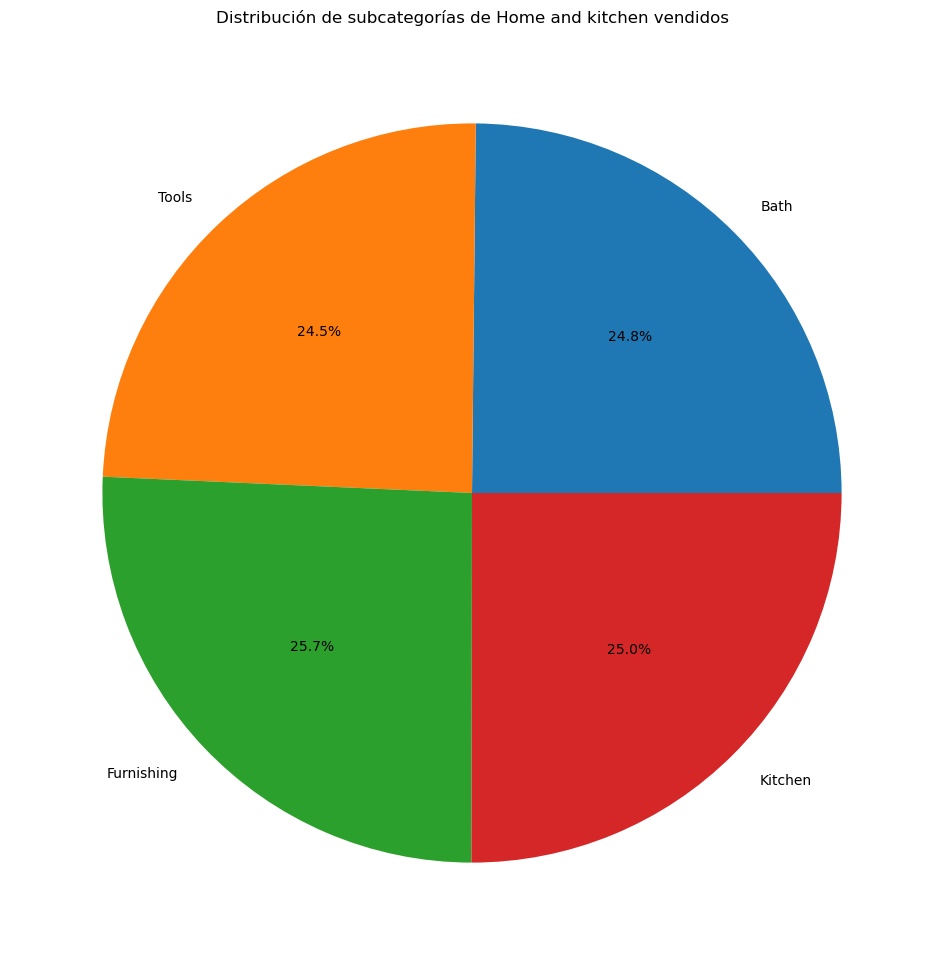

,Cantidad
Subcategorias,
Bath,265
Tools,261
Furnishing,274
Kitchen,267


In [64]:
dataSubHK=createSubPie(DataFr,'prod_cat','prod_subcat','Home and kitchen')
dataSubHK

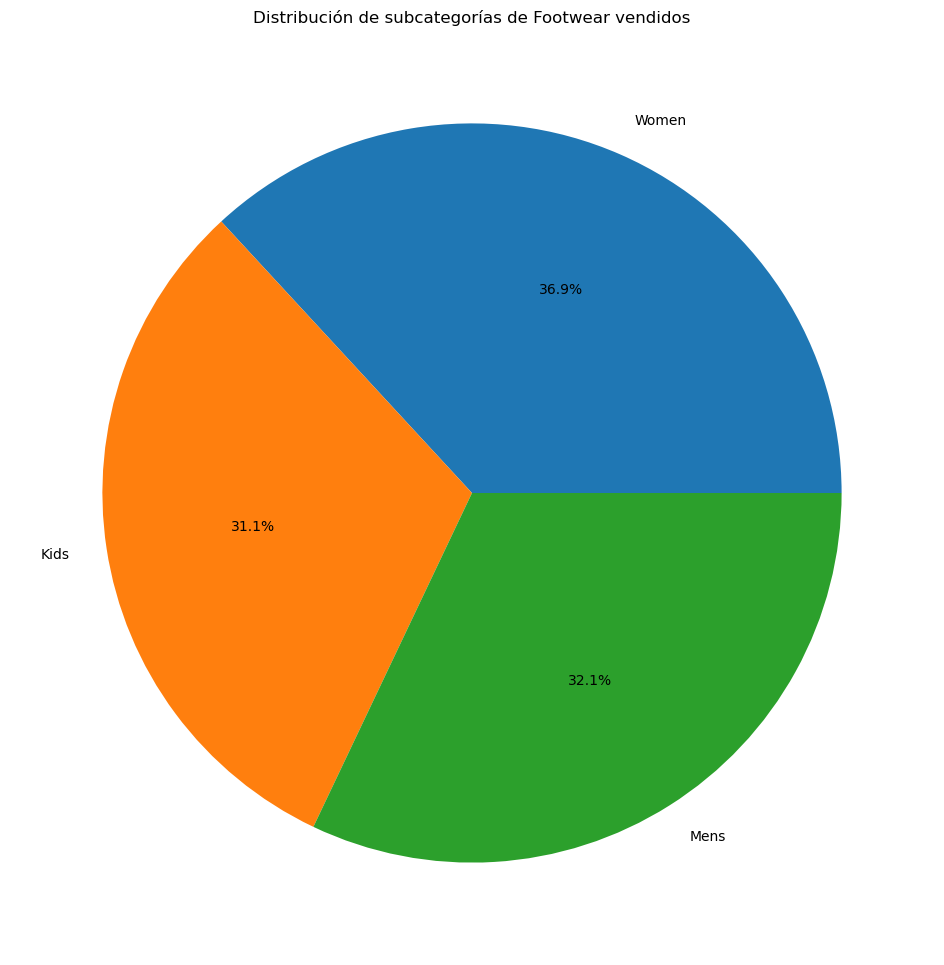

,Cantidad
Subcategorias,
Women,299
Kids,252
Mens,260


In [65]:
dataSubFoot=createSubPie(DataFr,'prod_cat','prod_subcat','Footwear')
dataSubFoot

4.2. Clasificación y distribución de categorías y subcategorías registradas en la base

In [66]:
Agrupa31=DataFr.groupby(['prod_cat'])
Agrupa31.Gender.sum()/Agrupa31.Gender.count()*100
# Gender=1 => Femenino

prod_cat
Bags                47.388060
Books               50.803859
Clothing            48.317631
Electronics         47.127329
Footwear            52.527744
Home and kitchen    48.359888
Name: Gender, dtype: float64

In [67]:
(1-Agrupa31.Gender.sum()/Agrupa31.Gender.count())*100

prod_cat
Bags                52.611940
Books               49.196141
Clothing            51.682369
Electronics         52.872671
Footwear            47.472256
Home and kitchen    51.640112
Name: Gender, dtype: float64

In [68]:
Agrupa3=DataFr.groupby([pd.cut(DataFr['Age'],bins=3),'prod_cat'])
Agrupa3_a=DataFr.groupby([pd.cut(DataFr['Age'],bins=3)])
Agrupa3.Gender.sum()/Agrupa3_a.Gender.sum()*100
# Gender=1 => Femenino

Age               prod_cat        
(28.977, 36.667]  Bags                 7.902736
                  Books               24.518744
                  Clothing            13.475177
                  Electronics         22.593718
                  Footwear            13.981763
                  Home and kitchen    17.527862
(36.667, 44.333]  Bags                 8.865979
                  Books               27.216495
                  Clothing            11.546392
                  Electronics         19.484536
                  Footwear            14.226804
                  Home and kitchen    18.659794
(44.333, 52.0]    Bags                 9.045226
                  Books               28.542714
                  Clothing            11.457286
                  Electronics         19.597990
                  Footwear            15.075377
                  Home and kitchen    16.281407
Name: Gender, dtype: float64

In [69]:
Agrupa3_a.Gender.count()-Agrupa3_a.Gender.sum()

Age
(28.977, 36.667]     962.0
(36.667, 44.333]    1118.0
(44.333, 52.0]       968.0
Name: Gender, dtype: float64

In [70]:
((Agrupa3.Gender.sum()/(Agrupa3_a.Gender.count()-Agrupa3_a.Gender.sum())))*100
#Para los varones

Age               prod_cat        
(28.977, 36.667]  Bags                 8.108108
                  Books               25.155925
                  Clothing            13.825364
                  Electronics         23.180873
                  Footwear            14.345114
                  Home and kitchen    17.983368
(36.667, 44.333]  Bags                 7.692308
                  Books               23.613596
                  Clothing            10.017889
                  Electronics         16.905188
                  Footwear            12.343470
                  Home and kitchen    16.189624
(44.333, 52.0]    Bags                 9.297521
                  Books               29.338843
                  Clothing            11.776860
                  Electronics         20.144628
                  Footwear            15.495868
                  Home and kitchen    16.735537
Name: Gender, dtype: float64

4.3. La distribución de compras de producto por categoría y género es casi equitativa. Las mochilas, las ropas, los aparatos electrónicos y artículos del hogar son comprados en su mayoría por varones, mientras que las mujeres prefieren comprar más libros y calzados. 

Esto es en general, ya que por rango de edades se tiene que las mujeres de 37 a 44 años compran estos productos en mayor cantidad que los varones, mientras que aquellas fuera del rango compran los productos en menor cantidad

In [71]:
def createDistSubs(dataset,variable,obj,nameVar,nameObj):
    percents=[]
    sumas=[]
    groups=dataset[variable].unique()
    AgrupaGr=dataset.groupby(variable)
    tot=round(dataset[obj].sum(),2)
    for gr in groups:
        var=AgrupaGr.get_group(gr)
        suma=var[obj].sum()
        sumas.append(suma)
        perc=round((suma/tot)*100,2)
        percents.append(perc)
    dataf=pd.DataFrame(
    {
        nameVar:groups,
        nameObj:percents,
        "Valores":sumas
    })
    dataf=dataf.set_index(dataf.columns[0])
    return dataf

In [72]:
createDistSubs(DataFr,'city_code','Tax',"Ciudades","Porcentaje de Impuesto de Compra")

,Porcentaje de Impuesto de Compra,Valores
Ciudades,,
7,10.04,145507.22
4,10.61,153861.19
10,9.86,142949.83
5,10.60,153754.02
9,10.47,151753.82
1,9.89,143367.43
3,10.01,145072.28
6,8.35,121031.25
8,10.38,150534.23


In [73]:
totIm=round(DataFr.Tax.sum(),2)
totIm

1449830.8

4.4. Si bien la distribución del pago total de impuestos por ciudad es casi equitativo, se puede observar que las ciudades que pagan más impuestos por sus compras son la ciudad 4 y 5

In [74]:
Agrupa_5=DataFr.groupby(['Store_type','Returned'])
Agrupa_5a=DataFr.groupby(['Store_type'])
Agrupa_5['total_amt'].sum()/Agrupa_5a['total_amt'].sum()*100

Store_type      Returned
Flagship store  0           90.390474
                1            9.609526
MBR             0           88.446450
                1           11.553550
TeleShop        0           90.585248
                1            9.414752
e-Shop          0           89.681713
                1           10.318287
Name: total_amt, dtype: float64

4.5. Los ingresos totales de las tiendas MBR y E-Shop son los que más son afectados por la devolución de productos por un 11% contra un 88% de adquisiciones permanentes, y un 10% contra un 89% de adquisiciones permanentes

In [75]:
Agrupa_5['total_amt'].sum()

Store_type      Returned
Flagship store  0           2837231.15
                1            301629.66
MBR             0           2876629.99
                1            375767.35
TeleShop        0           2696537.00
                1            280257.85
e-Shop          0           5606820.95
                1            645090.14
Name: total_amt, dtype: float64

- Las tiendas electrónicas tienen 5606820.95 dólares de ingresos netos
- Las tiendas electrónicas tienen 2876629.99 dólares de ingresos netos

In [76]:
Agrupa_6=DataFr.groupby([pd.cut(DataFr['Age'],bins=3),'prod_subcat'])
Agrupa_6a=DataFr.groupby([pd.cut(DataFr['Age'],bins=3)])
Agrupa_6['total_amt'].sum()/Agrupa_6a['total_amt'].sum()*100

Age               prod_subcat        
(28.977, 36.667]  Academic                5.053394
                  Audio and video         3.779591
                  Bath                    5.085091
                  Cameras                 5.305706
                  Children                4.357953
                  Comics                  4.035350
                  Computers               4.474635
                  DIY                     3.712463
                  Fiction                 3.683219
                  Furnishing              4.809040
                  Kids                    7.929149
                  Kitchen                 4.062495
                  Mens                   13.902426
                  Mobiles                 4.258684
                  Non-Fiction             4.420217
                  Personal Appliances     3.386899
                  Tools                   4.065743
                  Women                  13.677943
(36.667, 44.333]  Academic                3.

4.6. 
Si bien existe una preferencia acumulada hacia los calzados, ropas y mochilas de varón y mujer, por rangos se tiene que:
- 29 a 36 años: Se tiene una preferencia mayor a los artículos de baño, cámaras y libros académicos
- 37 a 44 años: Se tiene una preferencia mayor a los artículos electrónicos personales, cámaras y cómics
- 45 a 52 años: Se tiene una preferencia mayor a los los libros no ficticios, libros infantiles y ficticios

In [77]:
Agrupa_7=DataFr.groupby(['Year','prod_cat'])
Agrupa_7.Returned.sum()/Agrupa_7.Returned.count()*100

Year  prod_cat        
2011  Bags                16.477273
      Books                7.910751
      Clothing            10.426540
      Electronics          9.336609
      Footwear             9.205021
      Home and kitchen     8.306709
2012  Bags                10.909091
      Books               10.462777
      Clothing             7.488987
      Electronics          8.809524
      Footwear             9.722222
      Home and kitchen    11.111111
2013  Bags                 7.926829
      Books                9.109312
      Clothing            10.769231
      Electronics          9.156627
      Footwear             8.661417
      Home and kitchen     9.375000
2014  Bags                 6.451613
      Books                8.450704
      Clothing            20.000000
      Electronics          6.521739
      Footwear             3.333333
      Home and kitchen    16.666667
Name: Returned, dtype: float64

4.7. La gente tiende a devolver más ropas, artículos de hogar/cocina y mochilas en las transacciones
- 2011: Devolvieron más mochilas y ropas
- 2012: Devolvieron más productos del hogar/cocina, mochilas y libros
- 2013: Devolvieron más ropas
- 2014: Devolvieron mas ropas y productos del hogar/cocina

#### 5. Creamos gráficas para describir los diversos valores que tenemos: histogramas, diagramas de tortas, diagramas de cajas y bigotes

In [78]:
def getColors(leng):
    np.random.seed(2022)
    string = "0123456789abcdef"
    colors=[]
    for j in range(leng):
        color='#'
        for i in range(6):
            color+=string[np.random.randint(0,len(string))]
        colors.append(color)
    return colors

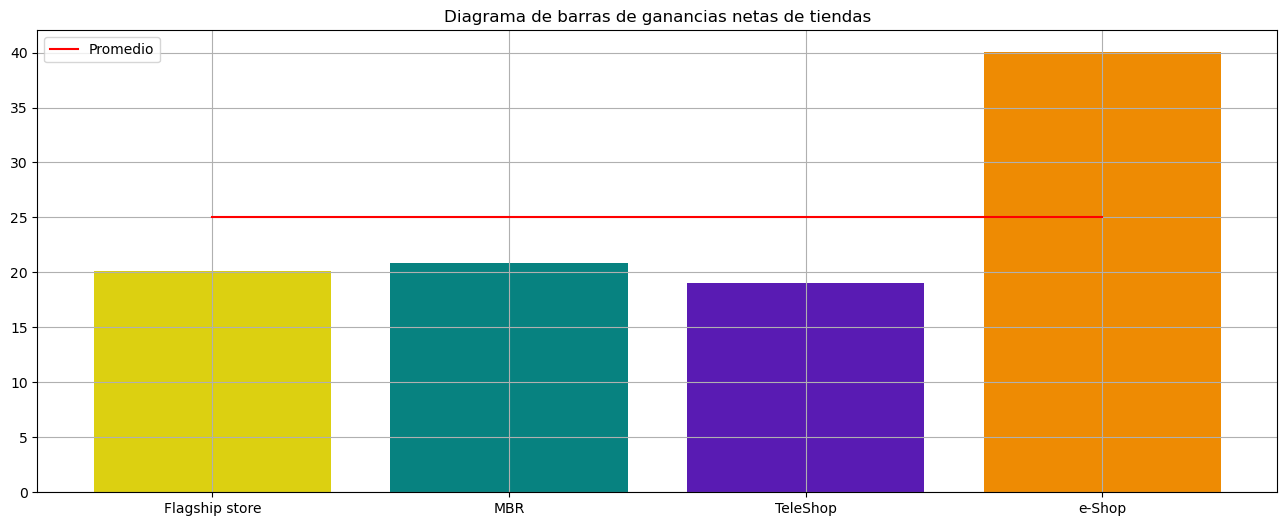

In [79]:
PorcentajeTiendas=pd.DataFrame(Agrupa1b['total_amt']/Agrupa1b['total_amt'].sum()*100)
plt.figure(figsize=(16,6))
plt.grid()
plt.bar(PorcentajeTiendas.index,PorcentajeTiendas['total_amt'],color=getColors(len(PorcentajeTiendas)))
Y=np.ones(len(PorcentajeTiendas))*PorcentajeTiendas['total_amt'].mean()
plt.plot(PorcentajeTiendas.index,Y,'r')
plt.title("Diagrama de barras de ganancias netas de tiendas")
plt.legend(['Promedio'])
plt.show()

In [80]:
Agrupa1c=(1-(Agrupa1.Returned.sum()/Agrupa1.Returned.count()))*100

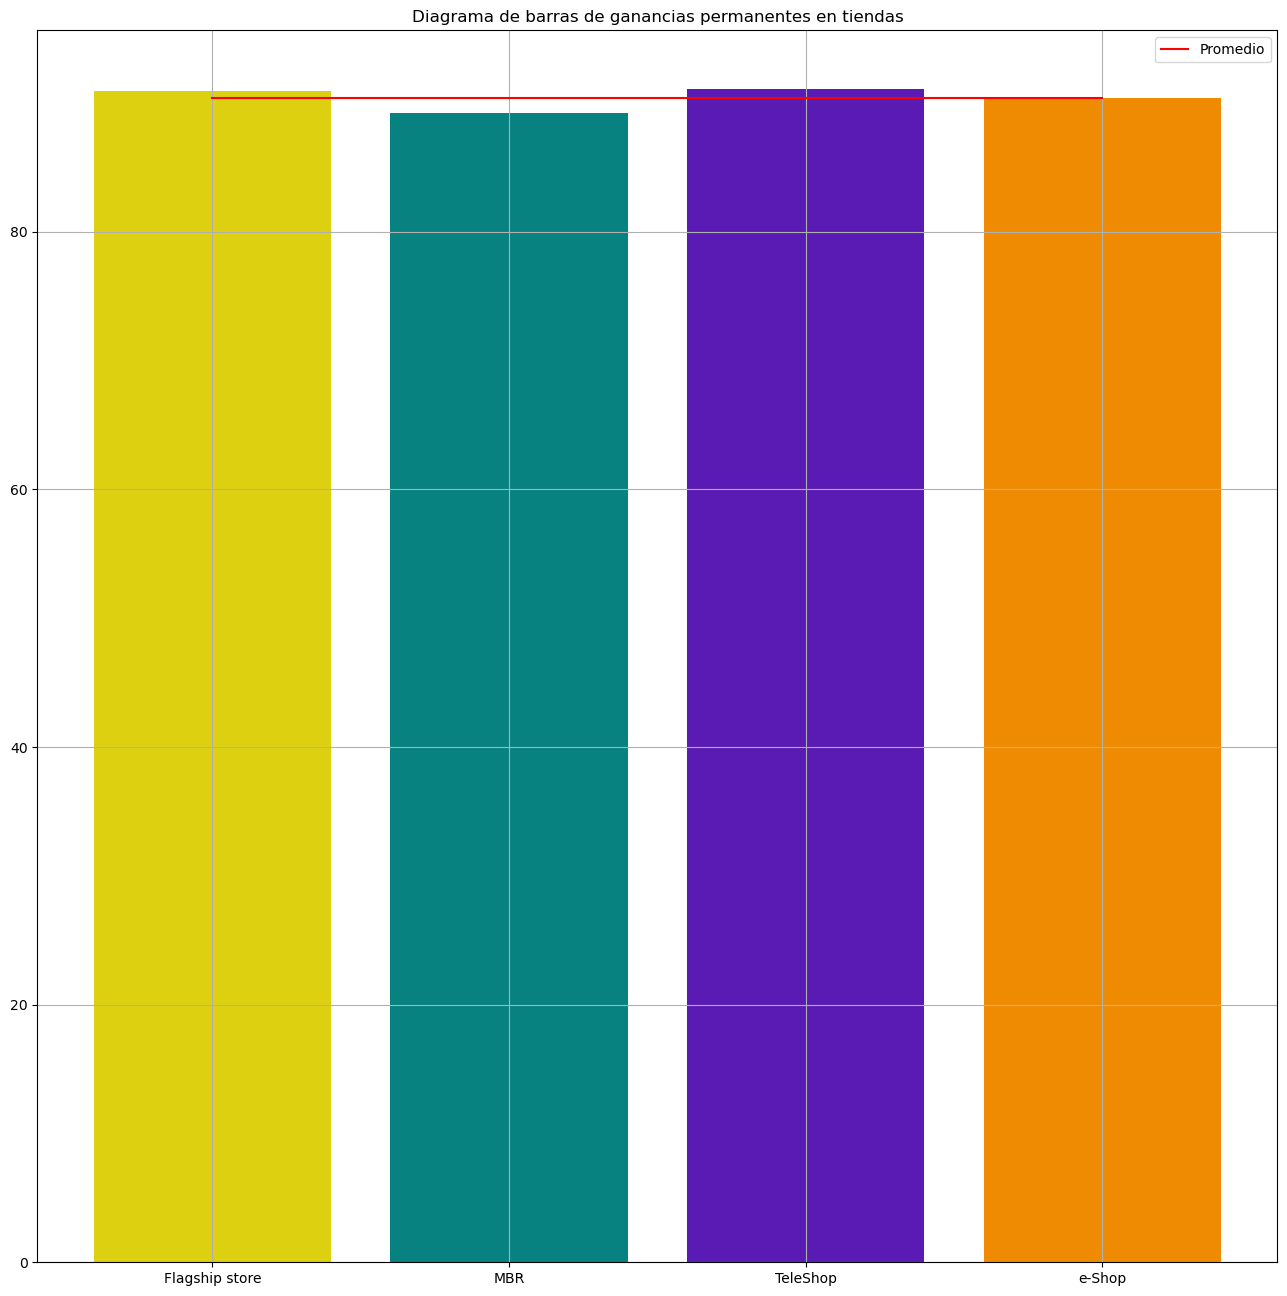

90.41082703161513

In [81]:
PorcentajeTiendas=pd.DataFrame(Agrupa1c)
plt.figure(figsize=(16,16))
plt.grid()
plt.bar(PorcentajeTiendas.index,PorcentajeTiendas['Returned'],color=getColors(len(PorcentajeTiendas)))
Y=np.ones(len(PorcentajeTiendas))*PorcentajeTiendas['Returned'].mean()
plt.plot(PorcentajeTiendas.index,Y,'r')
plt.title("Diagrama de barras de ganancias permanentes en tiendas")
plt.legend(['Promedio'])
plt.show()
PorcentajeTiendas['Returned'].mean()

In [82]:
Agrupa2

,total_amt
prod_cat,
Bags,536
Books,1555
Clothing,743
Electronics,1288
Footwear,811
Home and kitchen,1067


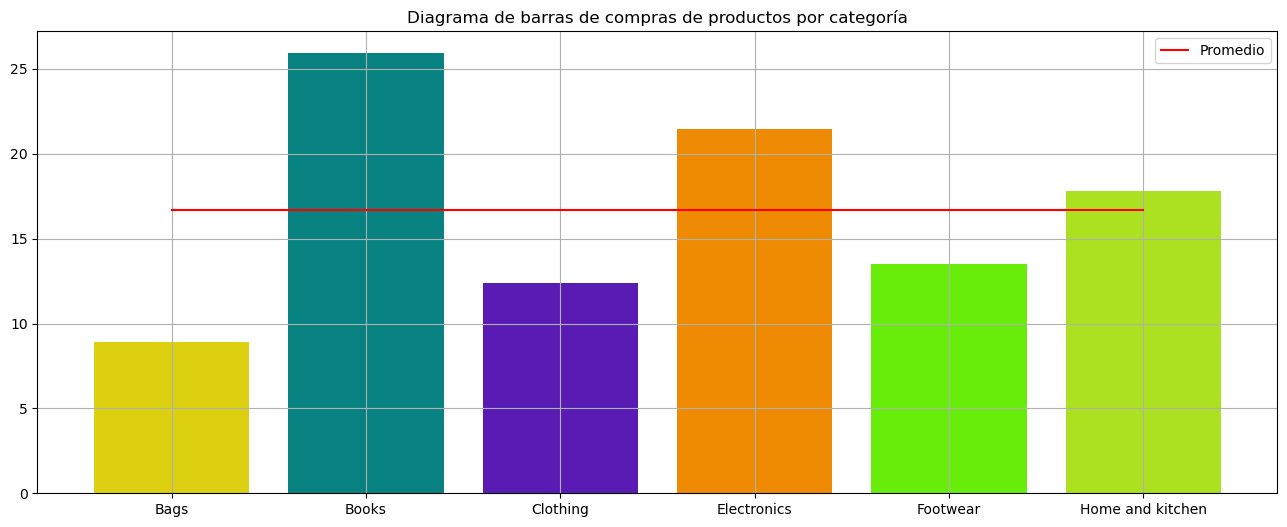

In [83]:
PorcentajeProd=pd.DataFrame(Agrupa2['total_amt']/Agrupa2['total_amt'].sum()*100)
plt.figure(figsize=(16,6))
plt.grid()
plt.bar(PorcentajeProd.index,PorcentajeProd['total_amt'],color=getColors(len(PorcentajeProd)))
Y=np.ones(len(PorcentajeProd))*PorcentajeProd['total_amt'].mean()
plt.plot(PorcentajeProd.index,Y,'r')
plt.title("Diagrama de barras de compras de productos por categoría")
plt.legend(['Promedio'])
plt.show()

In [84]:
def boxplotCreate(dataf,categoria,col,zona,gen,mode):
    #mode= numeral que es 1 (genero) o 2 (zona)
    data=''
    titl2=''
    if mode==1 and (gen==1 or gen==0):
        data=list(dataf[col][(dataf['prod_cat']==categoria) &((dataf['Returned']==0)&(dataf['Gender']==gen))])
        if gen==1:
            titl2=" en mujeres"
        elif gen==0:
            titl2=" en varones"
        else:
            titl2=""
    elif mode==2:
        data=list(dataf[col][(dataf['prod_cat']==categoria) &((dataf['Returned']==0)&(dataf['city_code']==zona))])
        titl2=" en zona "+ str(zona)
    else:
        print("Modo o datos inválidos")
    titulo="Diagrama de cajas y bigotes de "+categoria + titl2
    plt.boxplot(data)
    plt.title(titulo)
    plt.grid()
    plt.xlabel("Caja de ventas")
    plt.ylabel("Cantidades vendidas")
    plt.show()

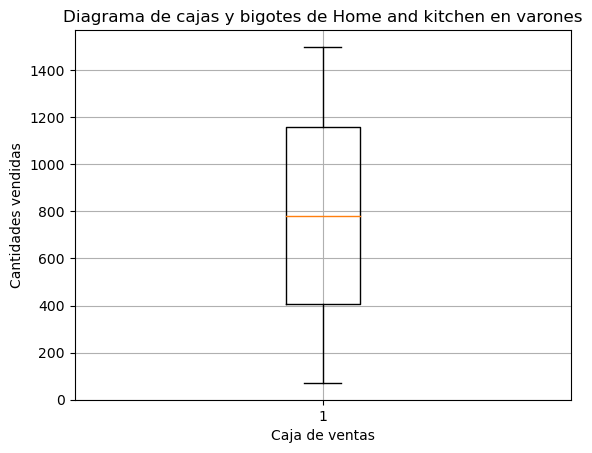

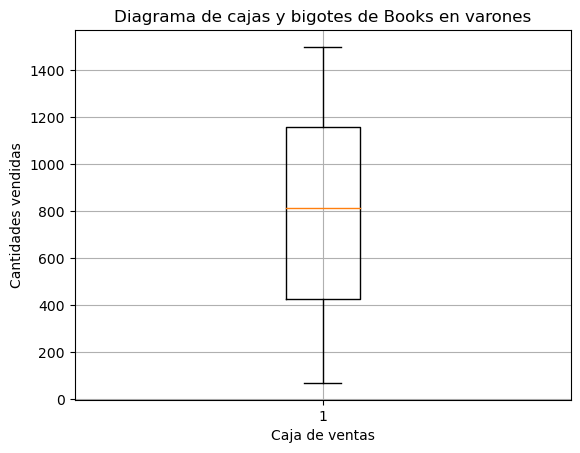

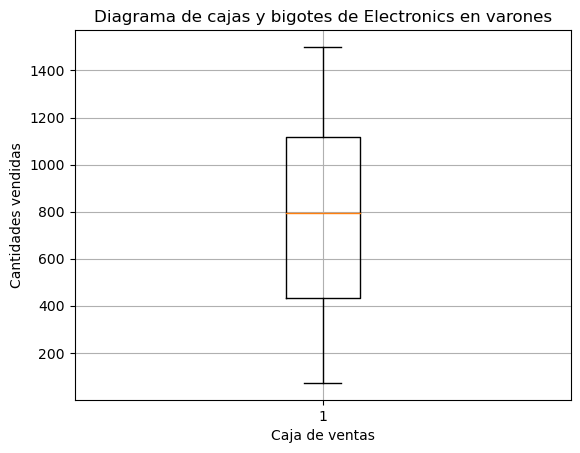

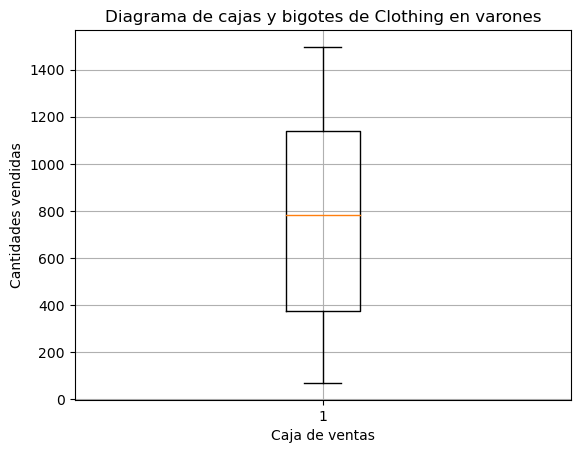

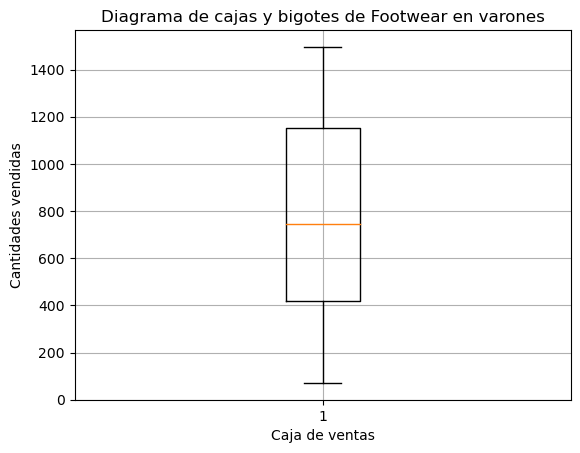

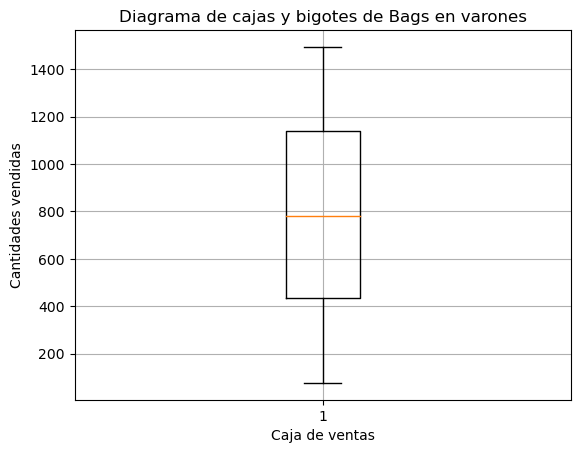

In [85]:
for cat in DataFr['prod_cat'].unique():
    boxplotCreate(DataFr,cat,'Rate',5,0,1)

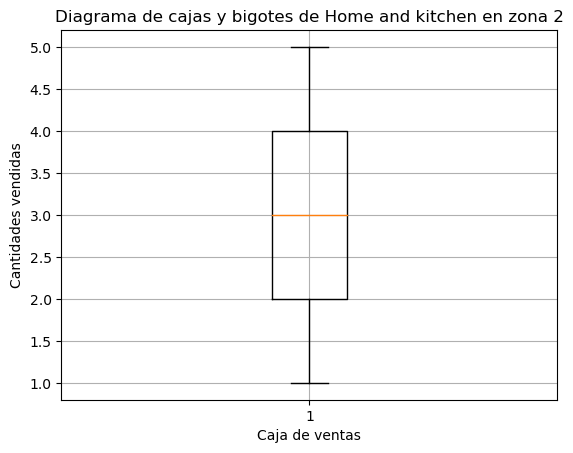

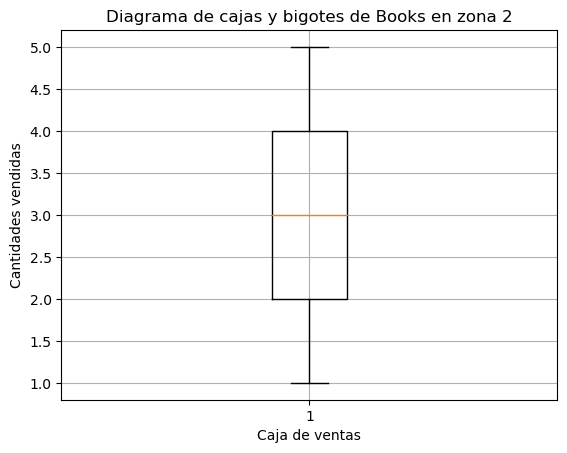

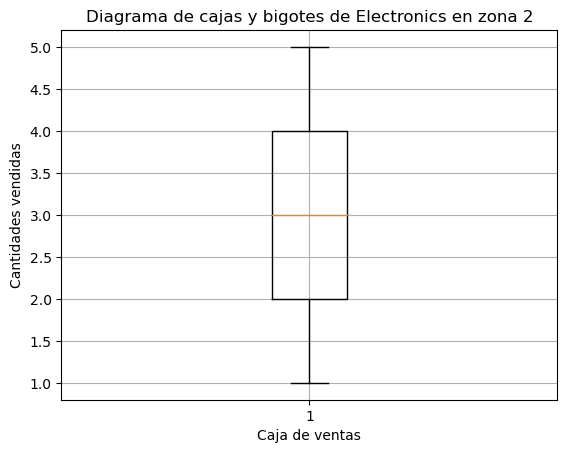

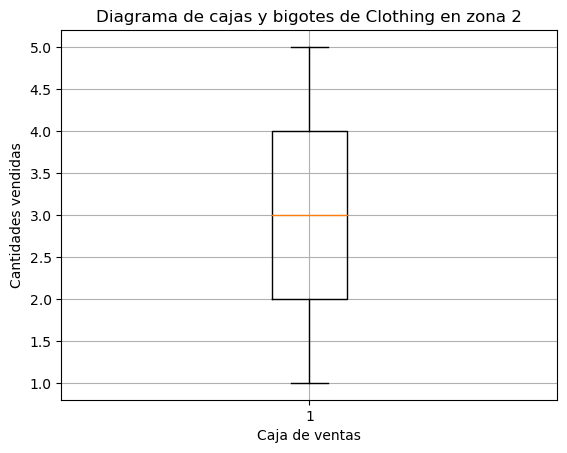

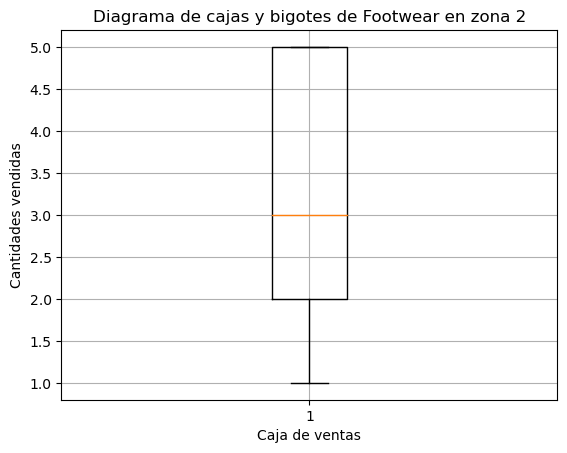

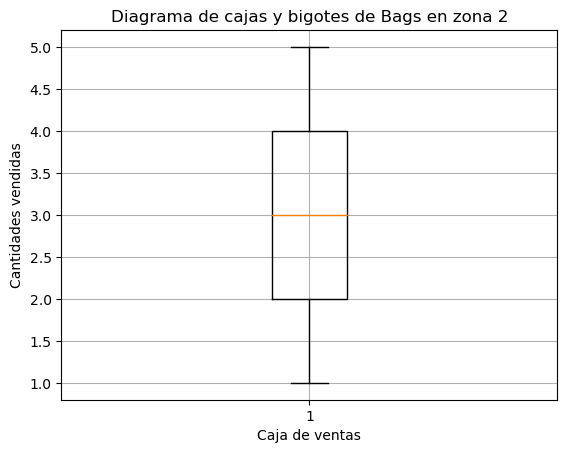

In [86]:
for cat in DataFr['prod_cat'].unique():
    boxplotCreate(DataFr,cat,'Qty',2,0,2)

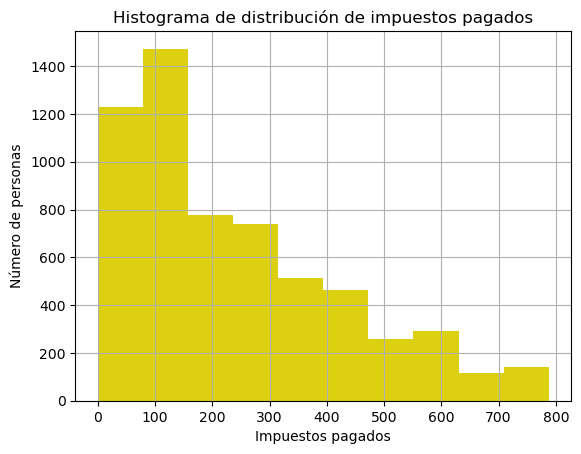

In [87]:
plt.hist(DataFr['Tax'],color=getColors(1)[0])
plt.title("Histograma de distribución de impuestos pagados")
plt.grid()
plt.xlabel("Impuestos pagados")
plt.ylabel("Número de personas")
plt.show()

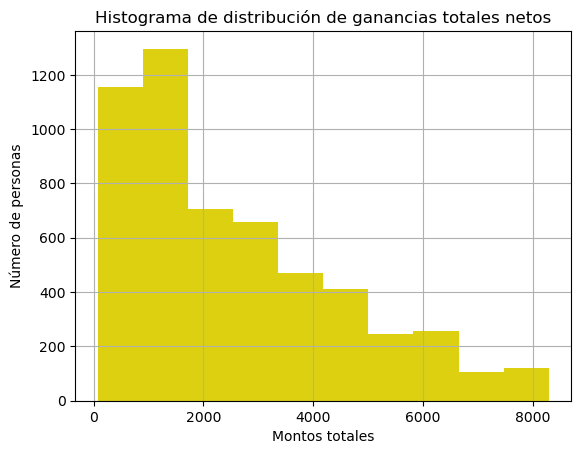

In [88]:
plt.hist(DataFr['total_amt'][DataFr['Returned']==0],color=getColors(1)[0])
plt.title("Histograma de distribución de ganancias totales netos")
plt.grid()
plt.xlabel("Montos totales")
plt.ylabel("Número de personas")
plt.show()

In [89]:
def getBySubcat(Dataf,col):
    RangoEdades=[29+7*i for i in range(3)]
    Edades=np.array([len(Dataf[(Dataf.Age>29+7*i)&(Dataf.Age<=29+7*(i+1))])for i in range(3)])
    suma=Dataf[col].sum()
    DepositosEdades=np.array([Dataf[col][((Dataf.Age>29+7*i)&(Dataf.Age<=29+7*(i+1)))& (Dataf.Returned==0)].sum() for i in range(3)])
  #  p_edad=pd.DataFrame({
   #     'Rango Edades':RangoEdades,
   #     'Porcentaje':DepositosEdades/suma*100
   # })
    p_edad=pd.DataFrame({
        'Rango Edades':RangoEdades,
        'Porcentaje':DepositosEdades/suma*100
    })
    return p_edad

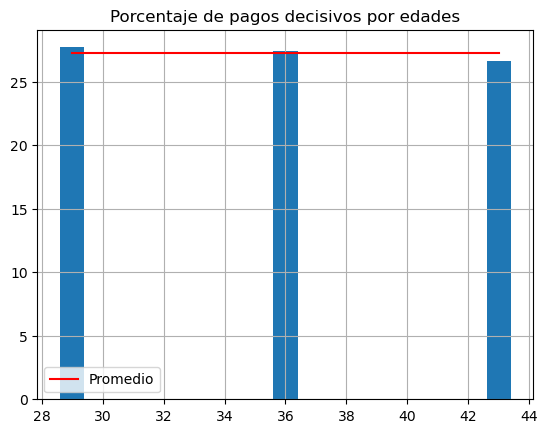

In [90]:
PorcentajeEdades=getBySubcat(DataFr,'total_amt')
plt.grid()
plt.bar(PorcentajeEdades["Rango Edades"],PorcentajeEdades.Porcentaje)
Y=np.ones(len(PorcentajeEdades.Porcentaje))*PorcentajeEdades['Porcentaje'].mean()
plt.plot(PorcentajeEdades["Rango Edades"],Y,'r')
plt.title("Porcentaje de pagos decisivos por edades")
plt.legend(['Promedio'])
plt.show()

#### 6. Realizar gráficas para ver las relaciones entre las variables (plot, nubes de puntos, etc)

In [91]:
DataFr.corr()

,Qty,Rate,Tax,total_amt,Year,city_code,Age,Gender,Returned
Qty,1.000000,-0.017466,0.605823,0.625146,0.000849,0.013484,-0.013675,0.000406,0.023675
Rate,-0.017466,1.000000,0.669894,0.693986,0.007371,0.024227,0.019864,-0.001672,0.021594
Tax,0.605823,0.669894,1.000000,0.966218,0.000677,0.024596,0.011456,0.000740,0.034190
total_amt,0.625146,0.693986,0.966218,1.000000,0.004003,0.025066,0.009955,-0.001308,0.029674
Year,0.000849,0.007371,0.000677,0.004003,1.000000,0.008565,-0.006748,-0.005820,0.000671
city_code,0.013484,0.024227,0.024596,0.025066,0.008565,1.000000,0.009057,0.006834,0.012437
Age,-0.013675,0.019864,0.011456,0.009955,-0.006748,0.009057,1.000000,-0.003984,0.007296
Gender,0.000406,-0.001672,0.000740,-0.001308,-0.005820,0.006834,-0.003984,1.000000,0.013136
Returned,0.023675,0.021594,0.034190,0.029674,0.000671,0.012437,0.007296,0.013136,1.000000


In [92]:
DataFr['total_amt'][DataFr['Returned']==0].sum()/DataFr['total_amt'].sum()*100

89.73912493802668

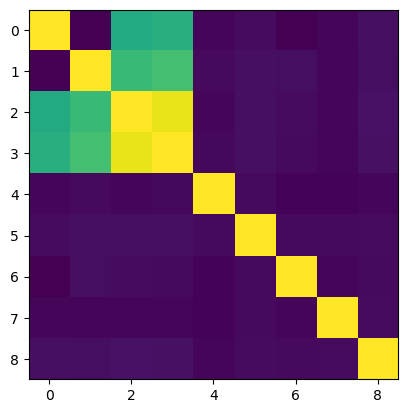

In [93]:
plt.imshow(DataFr.corr())
plt.show()

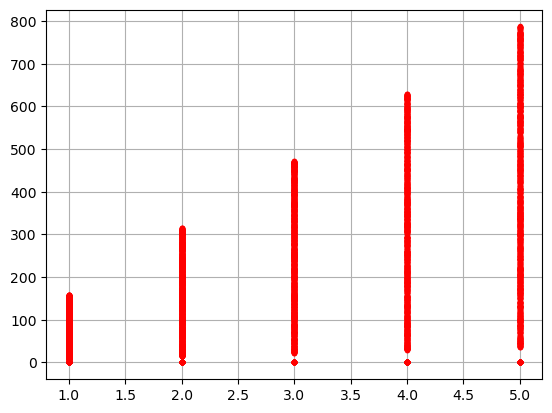

In [94]:
plt.plot(DataFr.Qty,DataFr.Tax,'r.')
plt.grid()
plt.show()

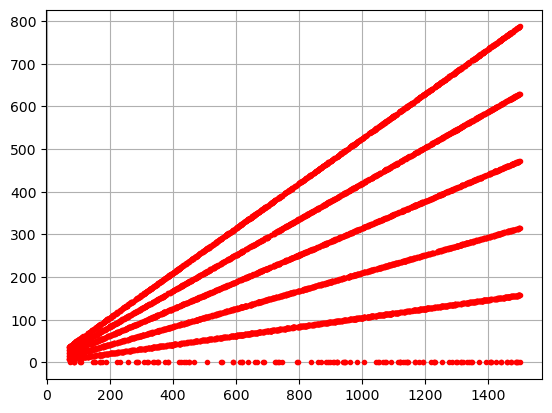

In [95]:
plt.plot(DataFr.Rate,DataFr.Tax,'r.')
plt.grid()
plt.show()

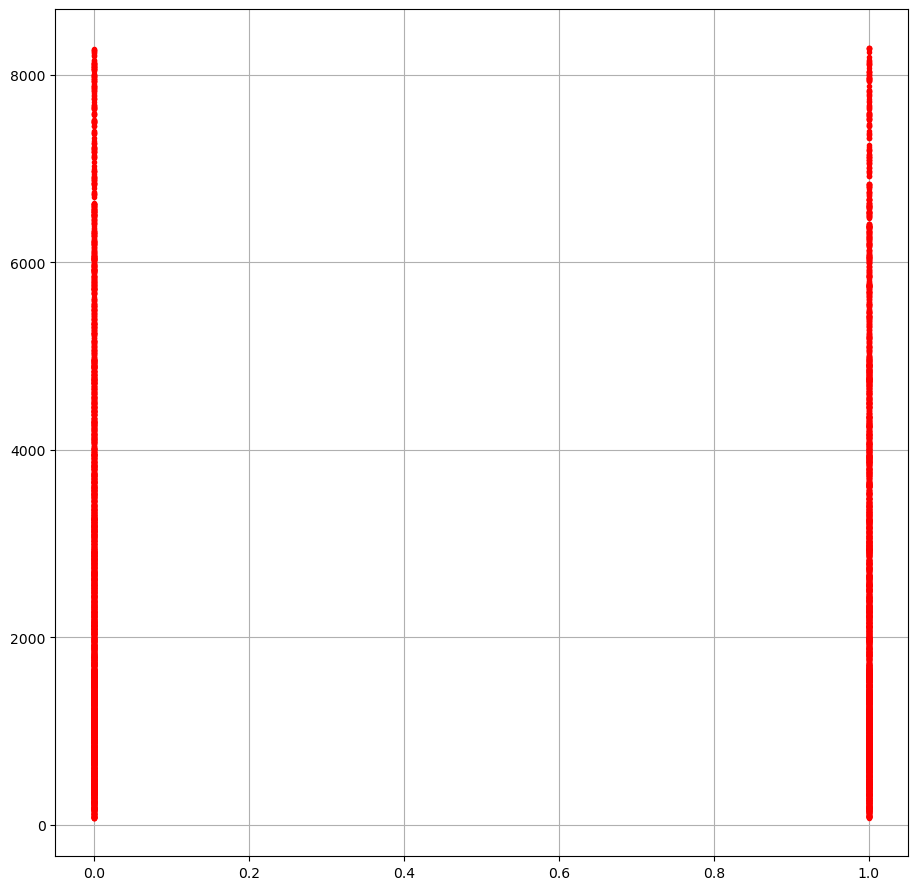

In [96]:
plt.figure(figsize=(11,11))
plt.plot(DataFr.Gender,DataFr.total_amt,'r.')
plt.grid()
plt.show()

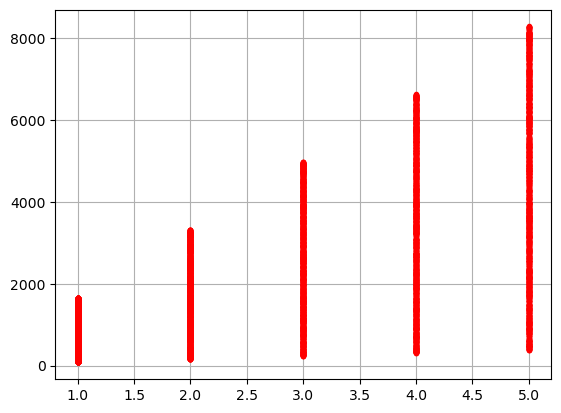

In [97]:
plt.plot(DataFr.Qty,DataFr.total_amt,'r.')
plt.grid()
plt.show()

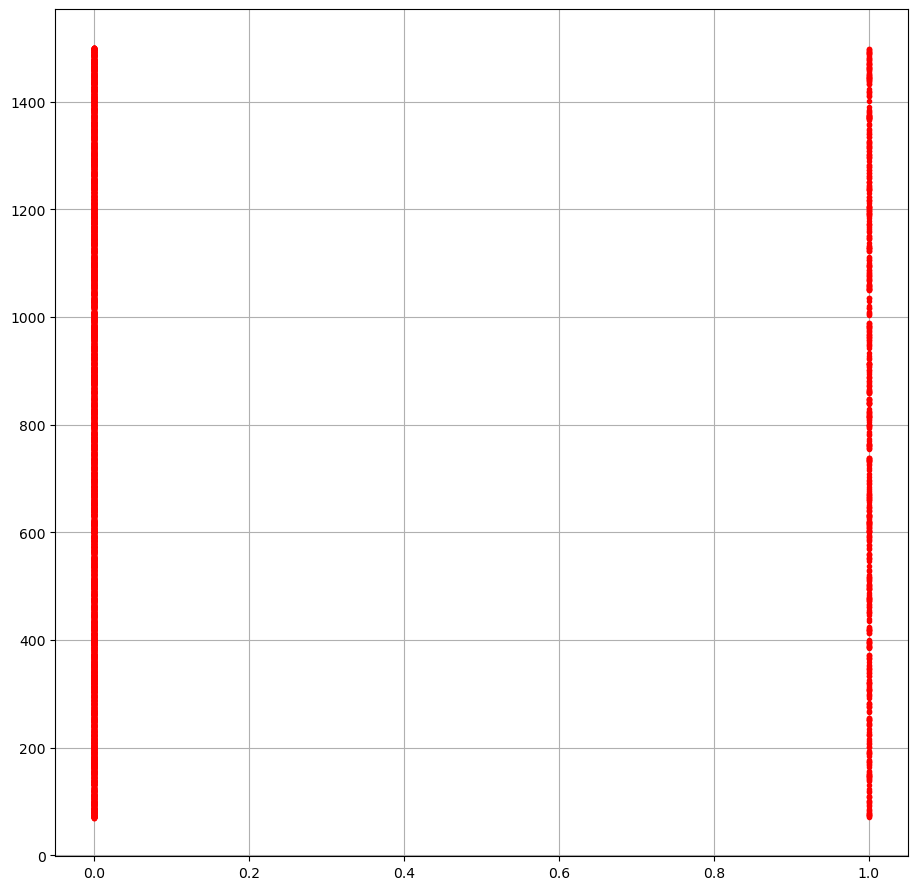

In [98]:
plt.figure(figsize=(11,11))
plt.plot(DataFr.Returned,DataFr.Rate,'r.')
plt.grid()
plt.show()

#### 7. En función de lo visto anteriormente y con las preguntas en mente, sacar conclusiones y recomendaciones.

Hemos visto la relación que existe entre las diversas variables categóricas y los ingresos generados en las transacciones

Se ha determinado que la media de los ingresos netos es de 25%, con las ventas realizadas por tiendas electrónicas/online siendo las unicas sobrepasando este límite. De este campo, el 90% de las ventas son permanentes, es decir, no registran devoluciones; con las telecompras y tiendas oficiales sobrepasando ligeramente el límite, mientras que el otro sector registra retornos de los productos, en especial de ropas, artículos de hogar/cocina y mochilas en las transacciones, siendo el año 2012 el que tuvo más categorías de devoluciones altas

Las preferencias de adquisición

- Ropas: Preferencia en ropas de varones
- Artículos de hogar/cocina: Casi igual, todas las clases (muebles, cocina, baños, herramientas)
- Mochilas: Preferencia en mochilas de varones
- Calzados: Preferencia en calzados de mujer
- Ropa: Preferencia en ropa infantil
- Libros: Preferencia en libros infantiles, cómics y no-ficticios

Así mismo, los productos con más ventas netas al sobrepasar el 17% de las ganancias son aquellos de clase electrónica, libros, y artículos de hogar/limpieza gracias a la población entre 37 a 44 años de clientes, con una preferencia ligeramente mayor de parte de las mujeres hacia los libros y zapatos. Esto quiere decir, que si bien hay diferencias de compras, la frecuencia de productos adquiridos es casi equitativa

Adjunto a esto, las zonas no tienen una diferencia significativa entre ellas en ventas de sus productos y los impuestos con los que los pagan. Es decir, una campaña de cualquier categoría en la tienda llegaría a todas las zonas, así como géneros y edades, aún con las mínimas distinciones de porcentajes

Como recomendaciones ante estas declaraciones:

- Siendo ya una era digital, las ofertas y ventas de productos pueden ser mejor vendidos (o al menos reservados) en páginas web o aplicaciones respectivas, siendo las tiendas oficiales un segundo punto de adquisición importante para la revisión del producto

- Si bien el nivel de devoluciones es mínimo, las tiendas de tipo MBR necesitarán revisar la calidad de sus productos para evitar reembolsos indeseados, así como las electrónicas (en estas sería más necesario debido a que no se sabe a simple vista la calidad del producto como en una tienda oficial)

- Para promociones y ventas de productos nuevos, enfocar al mercado femenino de 37 a 44 años (en especial calzados y libros) y al masculino de 29 a 36 y 45 a 52 años (mochilas, ropas, aparatos electrónicos y atrículos de hogar/limpieza)